k mean clustring

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder


In [3]:
traindata=pd.read_csv("Mall_Customers.csv")
traindata

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
traindata.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# preprocessing

In [6]:
encoder=LabelEncoder()
traindata["Gender"]=encoder.fit_transform(traindata["Gender"])

In [7]:
traindata.drop(["CustomerID"],axis=1,inplace=True)


# moidel train


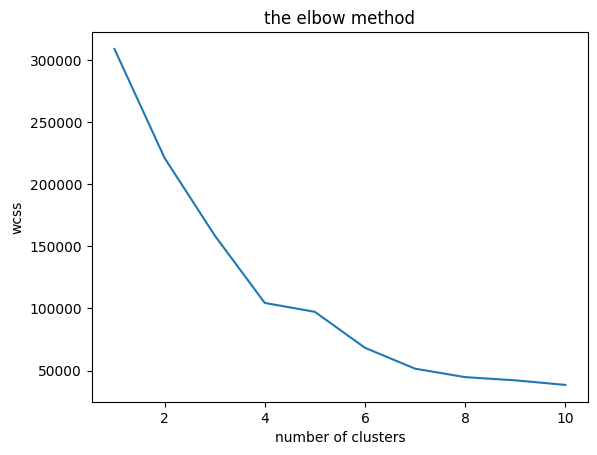

In [8]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(traindata)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()


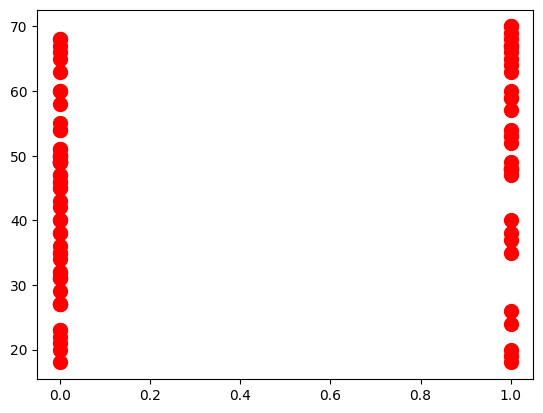

In [9]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_kmeans=kmeans.fit_predict(traindata)
plt.scatter(traindata.iloc[y_kmeans==0,0],traindata.iloc[y_kmeans==0,1],s=100,c="red",label="cluster1")

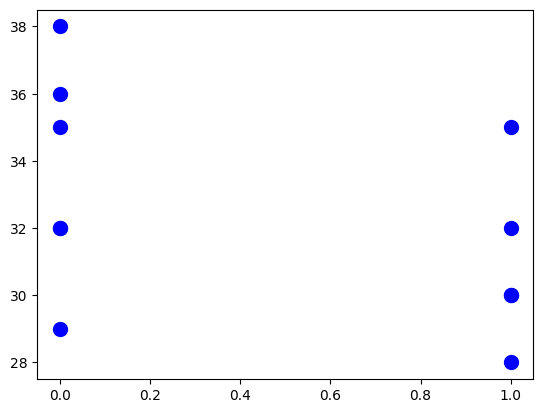

In [10]:
plt.scatter(traindata.iloc[y_kmeans==1,0],traindata.iloc[y_kmeans==1,1],s=100,c="blue",label="cluster2")

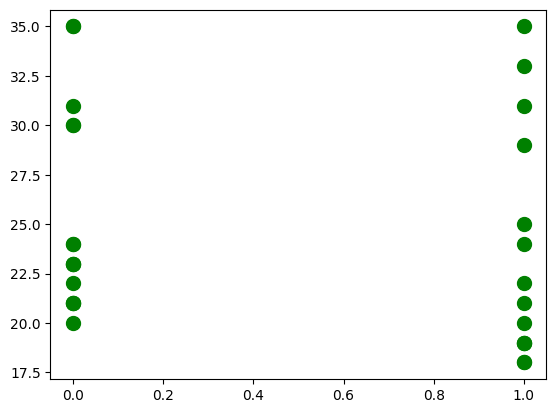

In [11]:
plt.scatter(traindata.iloc[y_kmeans==2,0],traindata.iloc[y_kmeans==2,1],s=100,c="green",label="cluster3")

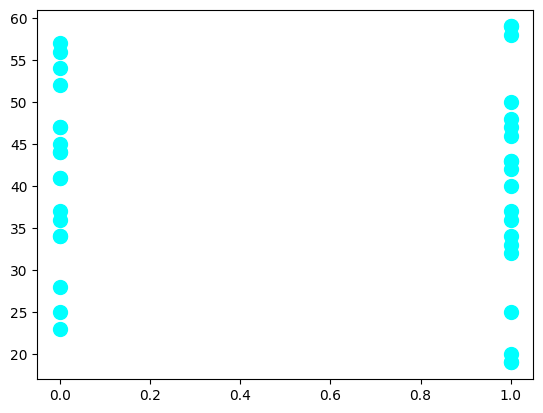

In [12]:
plt.scatter(traindata.iloc[y_kmeans==3,0],traindata.iloc[y_kmeans==3,1],s=100,c="cyan",label="cluster4")

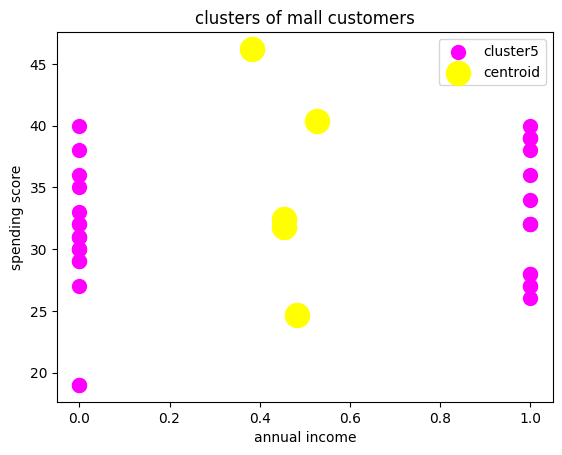

In [13]:
plt.scatter(traindata.iloc[y_kmeans==4,0],traindata.iloc[y_kmeans==4,1],s=100,c="magenta",label="cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="centroid")
plt.title("clusters of mall customers")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()
plt.show()


# model evaluation

In [14]:
silhouette_score(traindata,y_kmeans)

np.float64(0.3574050351346702)

In [17]:
# file submition
submition=pd.DataFrame({"Cluster":kmeans.labels_})
submition.to_csv("submition.csv",index=False)